In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm 
from watercalc import AFC_Wiener,ACF
import scipy as sc
import scipy.constants as scc
import statsmodels.api as sm
from scipy.optimize import curve_fit
import mdtraj as md
from tqdm import tqdm
kB = scc.Boltzmann
ffk = 2.7*10**(-26)/(300*kB)
ffk_5 = 12.5*10**(-26)/(300*kB)

In [10]:
def lin(x,a,b):
    return a*x+b

In [69]:
pth = f'./1_40.npy'
data_1 = np.load(pth,allow_pickle=True)

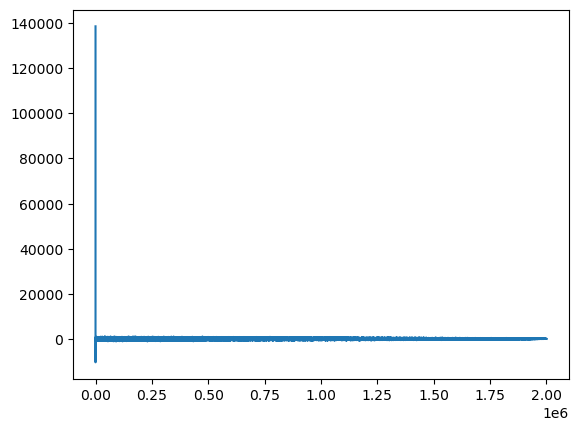

In [70]:
plt.plot(ACF(data_1[0][0]))

0
5
10
15
20
25
30
[-1.76343402e-05  5.33861916e-05 -2.18941098e-05 -6.64448079e-05
  5.38642776e-05  5.62040612e-07  6.38145228e-05]


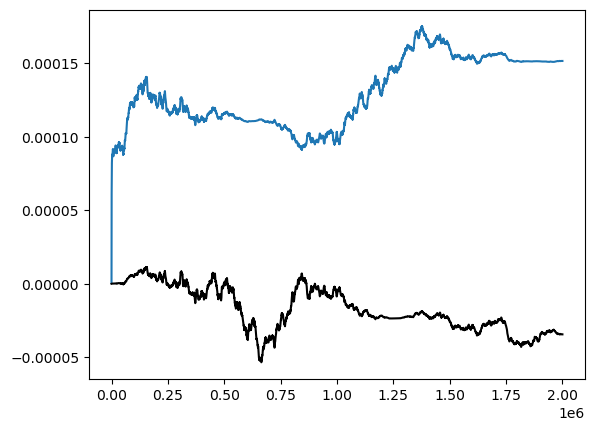

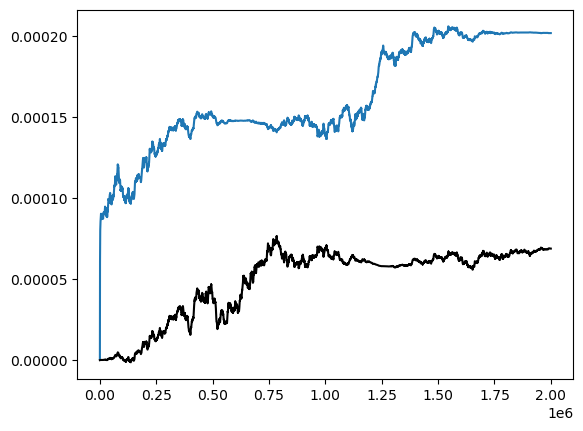

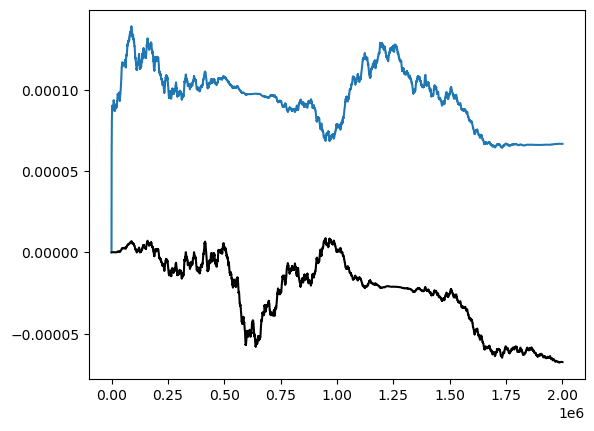

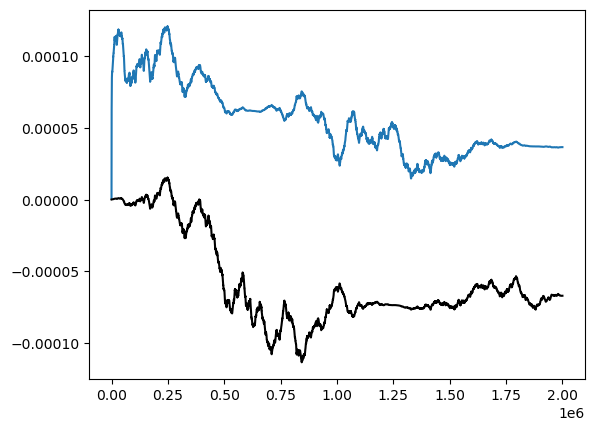

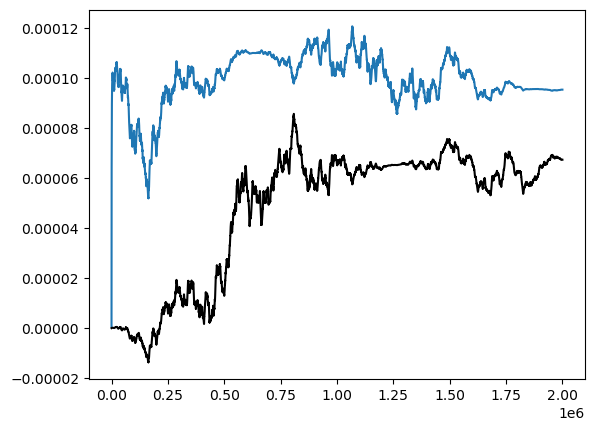

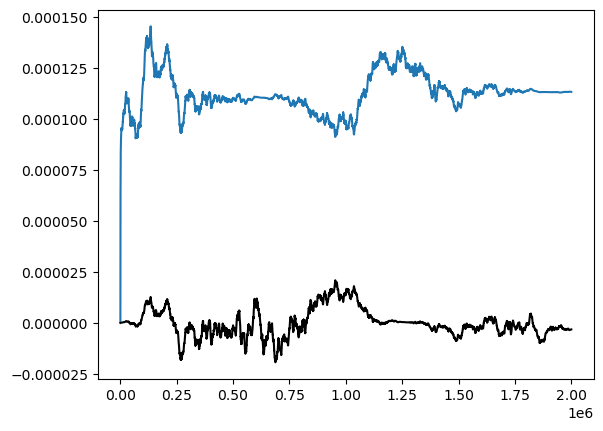

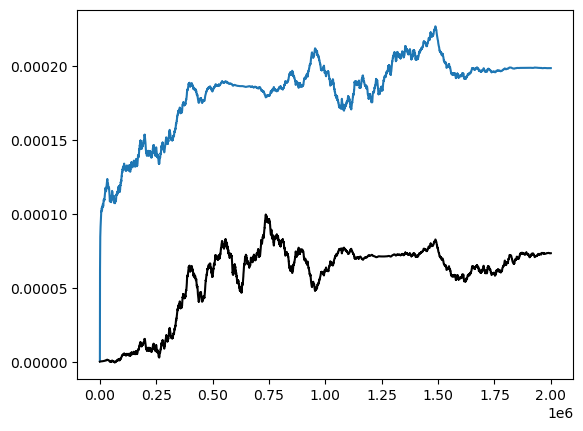

In [24]:
reel = []
ima = []

G = []

#a = 30
#shear = np.array([1,2,3,4,6,7,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,26,27,28,29]) #for 20

#shear = np.array([1,2,3,4,6,7,10,11,12,13,14,15,17,18,20,21,22,23,24,26,27,28,29])

#shear = np.array([1,2,3,4,6,7,10,11,12,13,14,15,17,18,20,21,22,23,26,27,28,29])

shear = [0,5,10,15,20,25,30]

I=250

omega = 50/(100*10**(-9))

for i in shear:
    
    print(i)
    
    pth = f'/home/nikolasmif98/nobackup/VE_FV_CG/{I}_{i}.npy'
    data_1 = np.load(pth,allow_pickle=True)

    t=np.linspace(0,10000*10**(-12),num=len(data_1[0][0])-6)

    dt = t[1] - t[0] 

    acf_x = ACF(data_1[0][0,:-5])
    acf_y = ACF(data_1[0][1,:-5])
    acf_z = ACF(data_1[0][2,:-5])

    acf = (acf_x+acf_y+acf_z)/3

 #   imnte = 1j**2.5*10**(11) * ((27*10**(-27))/(kB*300))* sc.integrate.cumtrapz( np.exp(- 1j*2.5*10**(11)*t) * acf, t,dx=dt)
    imnte = 1j*omega* ((2744*10**(-27))/(kB*300))* sc.integrate.cumtrapz( np.exp(- 1j*omega*t) * acf, t,dx=dt)

    

    
    DI = sc.integrate.cumtrapz(imnte,t[:-1],dx=dt)
    
    popt, pcov = curve_fit(lin,t[:-2],DI)
    
    G.append(popt[0])

    popt, pcov = curve_fit(lin,t[:-2],DI.real)
    
    reel.append(popt[0])
    
    popt2, pcov2 = curve_fit(lin,t[:-2],DI.imag)
    
    ima.append(popt2[0])
    
    plt.figure()
    plt.plot(imnte.imag)
    plt.plot((imnte.real),'k')
    
    
reel = np.array(reel)
ima = np.array(ima)

print(reel)

#np.save(f'reel_img_{a}.npy',[reel,ima])

In [29]:
np.mean(abs(reel)),np.std(abs(reel))

(3.965718436093853e-05, 2.3965581437030946e-05)

In [26]:
np.mean(ima),np.std(ima)

(0.00012016445477095524, 4.139145635639624e-05)

In [27]:
reel

array([-1.76343402e-05,  5.33861916e-05, -2.18941098e-05, -6.64448079e-05,
        5.38642776e-05,  5.62040612e-07,  6.38145228e-05])

In [77]:
imnte.shape

(2000003,)

In [78]:
t[:-2].shape

(2000002,)

In [12]:
data_1[0][1,:-5].shape

(2000000,)

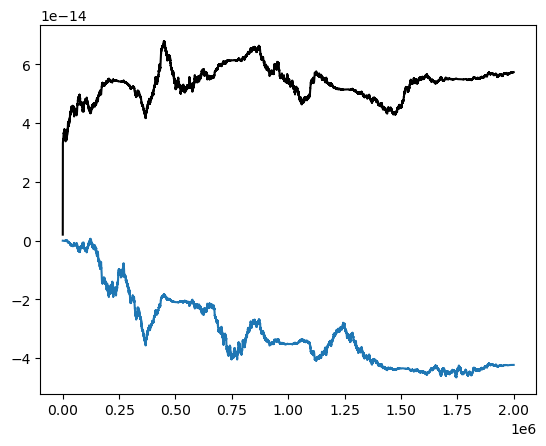

In [79]:
plt.plot(imnte.imag)
plt.plot((imnte.real),'k')

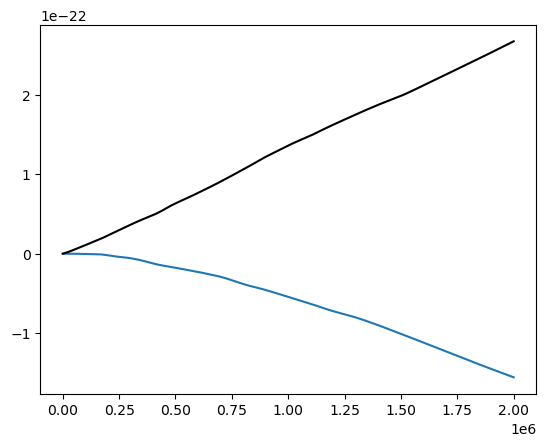

In [80]:
plt.plot(DI.imag)
plt.plot(abs(DI.real),'k')

In [10]:

len(data_1[0][0])

2000005

In [13]:
t=np.linspace(0,5,num=len(data_1[0][0]))

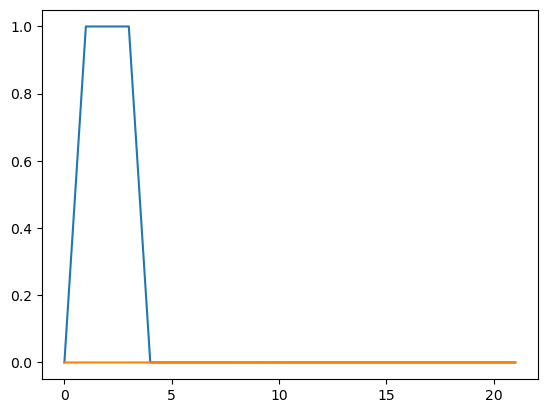

In [21]:
#plt.yscale('log')
plt.plot(reel)
plt.plot(reel2)
#plt.plot(ima)
#plt.plot(G,'k')

#plt.plot(abs(np.array([ima])))

In [ ]:
 shear_pznt = np.array([0.001,,93.34,97])

In [4]:
shear_pznt = []

for i in range(15,150000,5000):
    shear_pznt.append((i*2000)/3)
    
shear_pznt = np.array(shear_pznt)  *0.000001  

In [5]:
shear_pznt*0.000001

array([1.00000000e-08, 3.34333333e-06, 6.67666667e-06, 1.00100000e-05,
       1.33433333e-05, 1.66766667e-05, 2.00100000e-05, 2.33433333e-05,
       2.66766667e-05, 3.00100000e-05, 3.33433333e-05, 3.66766667e-05,
       4.00100000e-05, 4.33433333e-05, 4.66766667e-05, 5.00100000e-05,
       5.33433333e-05, 5.66766667e-05, 6.00100000e-05, 6.33433333e-05,
       6.66766667e-05, 7.00100000e-05, 7.33433333e-05, 7.66766667e-05,
       8.00100000e-05, 8.33433333e-05, 8.66766667e-05, 9.00100000e-05,
       9.33433333e-05, 9.66766667e-05])

In [6]:
reel,imag = np.load('./reel_img_10.npy',allow_pickle=True)
reel2,imag2 = np.load('./reel_img_15.npy',allow_pickle=True)
reel3,imag3 = np.load('./reel_img_20.npy',allow_pickle=True)
reel4,imag4 = np.load('./reel_img_25.npy',allow_pickle=True)
reel5,imag5 = np.load('./reel_img_30.npy',allow_pickle=True)
reel6,imag6 = np.load('./reel_img_35.npy',allow_pickle=True)
reel7,imag7 = np.load('./reel_img_40.npy',allow_pickle=True)


reel_5_20 = np.mean([reel,reel2,reel3],axis=0)
reel_5_20_err = np.std([reel,reel2,reel3],axis=0)



imag_5_20 = np.mean([imag,imag2,imag3],axis=0)
imag_5_20_err = np.std([imag,imag2,imag3],axis=0)

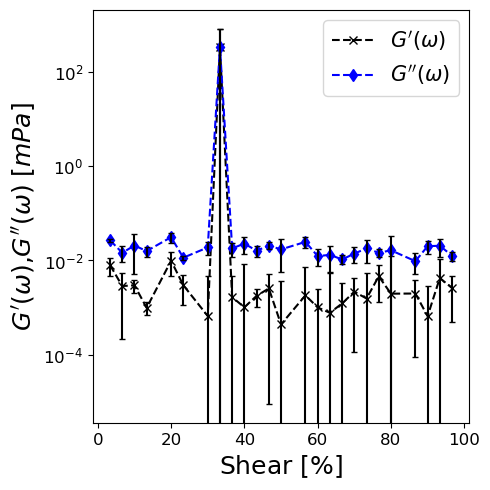

In [14]:
shear = np.array([1,2,3,4,6,7,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,26,27,28,29]) #for 20


#shear_pznt[shear]

plt.figure(figsize=(5,5))

plt.yscale('log')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel(r'Shear $[\%]$',fontsize=18)
plt.ylabel(r'$G^\prime (\omega)$,$G^{\prime\prime} (\omega)$ $[mPa]$',fontsize=18)


plt.plot(shear_pznt[shear],abs(np.array(reel_5_20)*10**(3)),'kx--',label=r'$G^\prime (\omega)$')

plt.errorbar(shear_pznt[shear],abs(np.array(reel_5_20)*10**(3)),yerr=reel_5_20_err*10**(3), fmt= ' ', capsize=2,color='black')

plt.plot(shear_pznt[shear],abs(np.array(imag_5_20)*10**(3)),'bd--',label=r'$G^{\prime\prime} (\omega)$')
plt.errorbar(shear_pznt[shear],abs(np.array(imag_5_20)*10**(3)),yerr=imag_5_20_err*10**(3), fmt= ' ', capsize=2,color='black')

#plt.plot(shear_pznt[shear],abs(np.array(imag_5_20))*10**(3),'bx--')
plt.legend(fontsize=15)

plt.tight_layout()

plt.savefig('/home/nikolasmif98/fig/VE_plot.png')

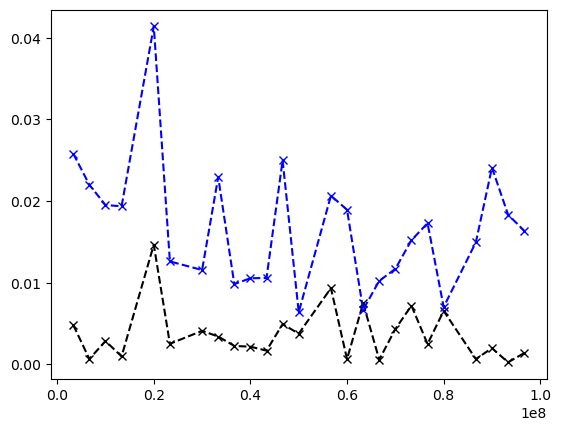

In [8]:

shear = np.array([1,2,3,4,6,7,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,26,27,28,29]) #for 20


shear_pznt[shear]

plt.plot(shear_pznt[shear],abs(np.array(reel)*10**(3)),'kx--')
plt.plot(shear_pznt[shear],abs(np.array(imag))*10**(3),'bx--')

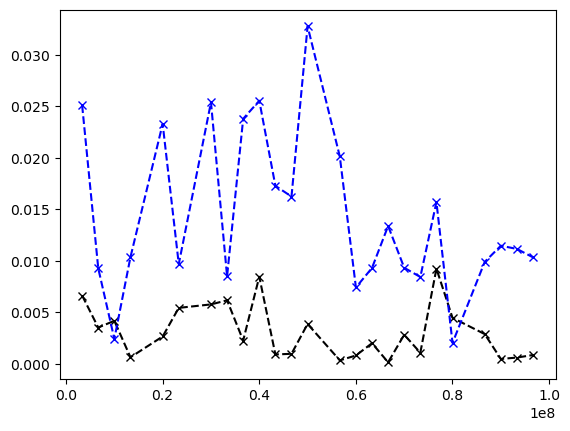

In [11]:

shear = np.array([1,2,3,4,6,7,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,26,27,28,29]) #for 20


shear_pznt[shear]

plt.plot(shear_pznt[shear],abs(np.array(reel2)*10**(3)),'kx--')
plt.plot(shear_pznt[shear],abs(np.array(imag2))*10**(3),'bx--')

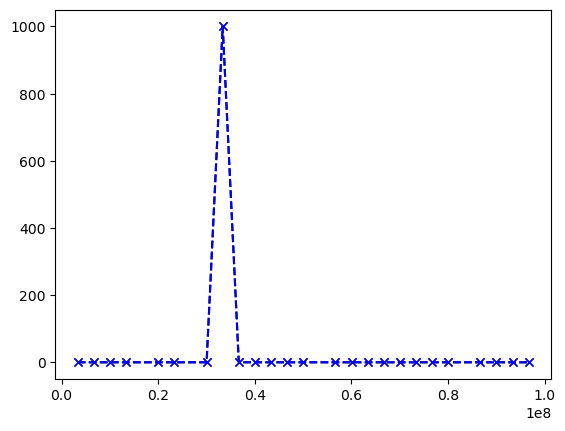

In [12]:

shear = np.array([1,2,3,4,6,7,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,26,27,28,29]) #for 20


shear_pznt[shear]

plt.plot(shear_pznt[shear],abs(np.array(reel3)*10**(3)),'kx--')
plt.plot(shear_pznt[shear],abs(np.array(imag3))*10**(3),'bx--')

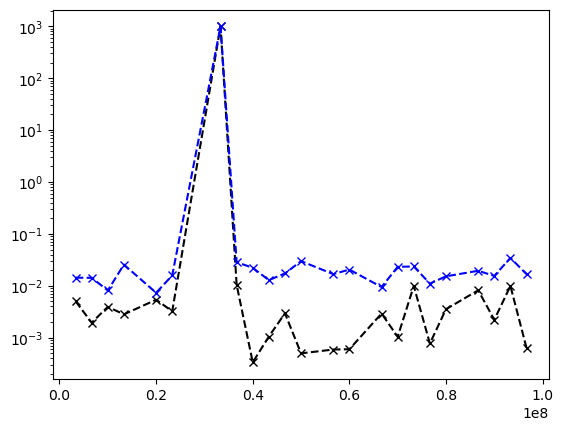

In [19]:


shear = np.array([1,2,3,4,6,7,10,11,12,13,14,15,17,18,20,21,22,23,24,26,27,28,29])

shear_pznt[shear]

plt.yscale('log')

plt.plot(shear_pznt[shear],abs(np.array(reel4)*10**(3)),'kx--')
plt.plot(shear_pznt[shear],abs(np.array(imag4))*10**(3),'bx--')

ValueError: x and y must have same first dimension, but have shapes (25,) and (23,)

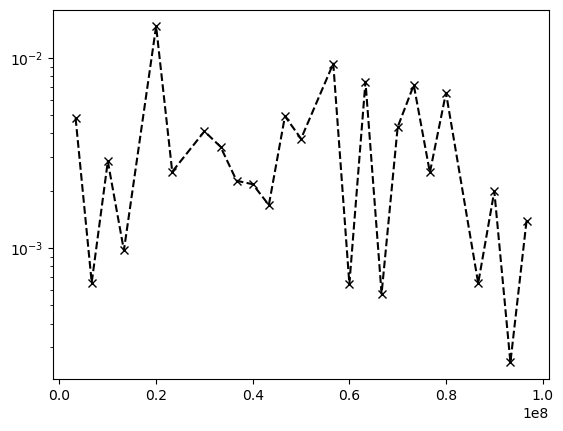

In [92]:
plt.yscale('log')

#X_40
shear = np.array([1,2,3,4,6,7,10,11,12,13,14,15,17,18,20,21,22,23,26,27,28,29])

shear = np.array([1,2,3,4,6,7,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,26,27,28,29]) #for 20


shear_pznt[shear]

plt.plot(shear_pznt[shear],abs(np.array(reel)*10**(3)),'kx--')
plt.plot(shear_pznt[shear],abs(np.array(ima))*10**(3),'bx--')

#X_35
plt.plot(shear_pznt[shear],abs(np.array(reel2)*10**(3)),'kx--')
plt.plot(shear_pznt[shear],abs(np.array(ima2))*10**(3),'bx--')

#X_30

shear = np.array([1,2,3,4,6,7,10,11,12,13,14,15,17,18,20,21,22,23,24,26,27,28,29])

plt.plot(shear_pznt[shear],abs(np.array(reel3)*10**(3)),'kx--')
plt.plot(shear_pznt[shear],abs(np.array(ima3))*10**(3),'bx--')

plt.plot(shear_pznt[shear],abs(np.array(reel4)*10**(3)),'kx--')
plt.plot(shear_pznt[shear],abs(np.array(ima4))*10**(3),'bx--')

plt.plot(shear_pznt[shear],abs(np.array(reel5)*10**(3)),'kx--')
plt.plot(shear_pznt[shear],abs(np.array(ima5))*10**(3),'bx--')

plt.plot(shear_pznt[shear],abs(np.array(reel5)*10**(3)),'kx--')
plt.plot(shear_pznt[shear],abs(np.array(ima5))*10**(3),'bx--')

In [72]:
np.save('reel_img_25.npy',[reel3,ima3])

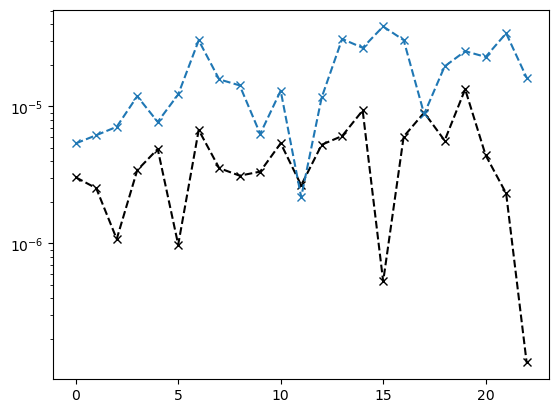

In [5]:
plt.yscale('log')

plt.plot(abs(np.array(reel)),'kx--')
plt.plot(abs(np.array(ima)),'x--')

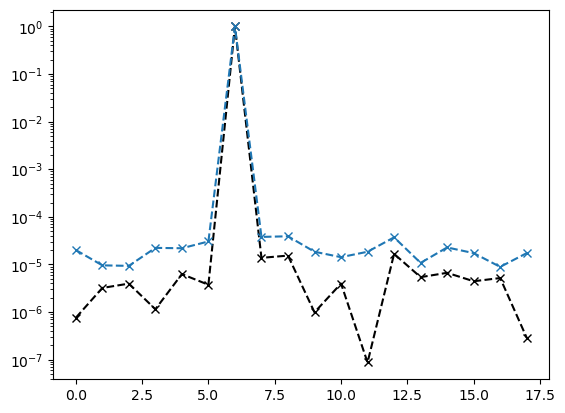

In [7]:
plt.yscale('log')

plt.plot(abs(np.array(reel)),'kx--')
plt.plot(abs(np.array(ima)),'x--')

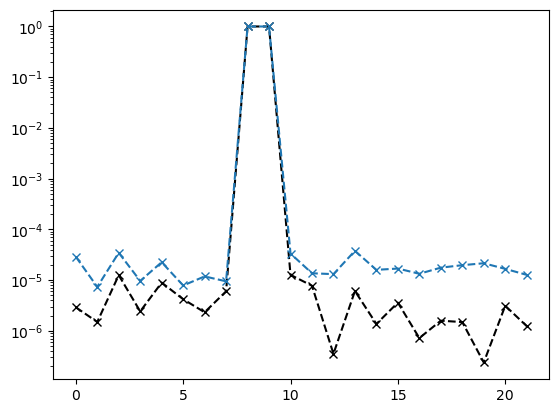

In [10]:
plt.yscale('log')

plt.plot(abs(np.array(reel)),'kx--')
plt.plot(abs(np.array(ima)),'x--')

In [14]:
np.array(ima)*10**(3)


array([2.89827180e-02, 7.36272117e-03, 3.46762757e-02, 9.66749230e-03,
       2.25935690e-02, 7.85396149e-03, 1.18533907e-02, 9.49155402e-03,
       1.00000000e+03, 1.00000000e+03, 3.34382421e-02, 1.36729674e-02,
       1.31370531e-02, 3.78781411e-02, 1.59662982e-02, 1.69406697e-02,
       1.33686793e-02, 1.76396223e-02, 1.97312811e-02, 2.15499750e-02,
       1.67006366e-02, 1.27316319e-02])

In [10]:
def G_star(P_tensor,omega,T,V): 
    
    #ACF_xy = ACF(P_tensor[])
    #ACF_xz = ACF(P_tensor[])
    #ACF_yz = ACF(P_tensor[])
    
    #AutoCF =(ACF_xy + ACF_xz + ACF_yz )/3
    
    AutoCF = AFC_Wiener(P_tensor)
    
    dt = P_tensor[0,1]-P_tensor[0,0]
    
    
    G_sta = 1j**omega * (V/(kB*T)) * sc.integrate.cumtrapz( np.exp(- 1j*omega*data[0,1:]) * AutoCF[0], P_tensor[0,1:]*10**(-12),dx=dt)
#    G_sta =  sc.integrate.cumtrapz( np.exp(- 1j*omega*data[0,1:]) * AutoCF[0], P_tensor[0,1:]*10**(-12),dx=dt)
    
    G_prime = G_sta.imag
    
    G_dprime = G_sta.real
    
    return G_prime,G_dprime
    
    

In [118]:
G = G_star(data[1:],250000000,300,27*10**(-25))

start own


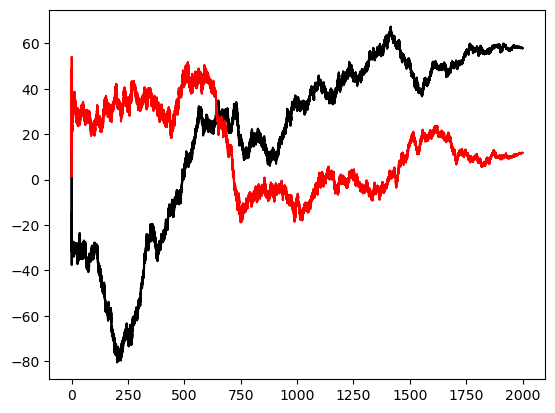

In [119]:
plt.plot(data[0,2:],G[0],'k')
plt.plot(data[0,2:],G[1],'r')

In [121]:
np.mean(G[1][200000:]),np.std(G[1][200000:])

(5.675610598320784, 9.278251596603535)

(1500.0, 2000.0)

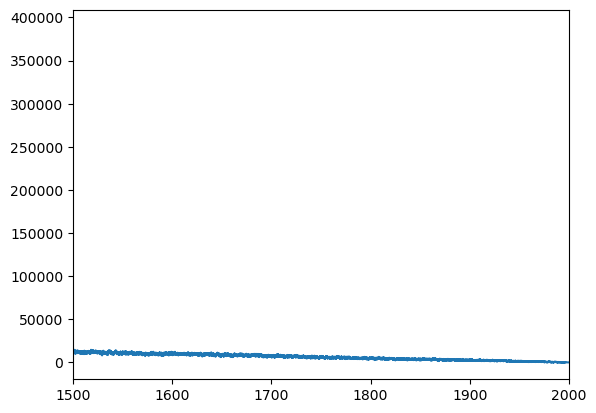

In [127]:
#h = ACF(data[1])
plt.plot(data[0][1:],h)

plt.xlim(1500,2000)

In [66]:
a = sc.integrate.cumtrapz(G[0],data[0,2:])

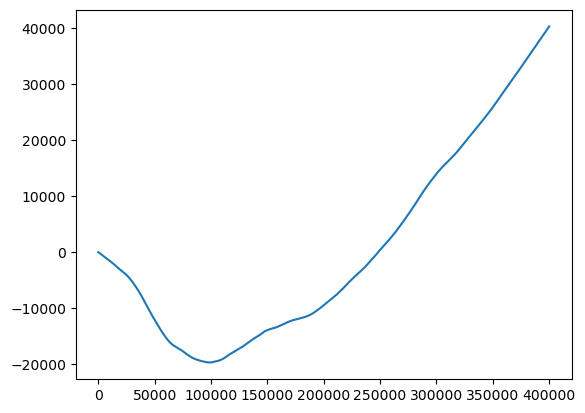

In [67]:
plt.plot(a)

In [2]:
def vis_star(P_tensor,omega,T,V): 
    
    #ACF_xy = ACF(P_tensor[])
    #ACF_xz = ACF(P_tensor[])
    #ACF_yz = ACF(P_tensor[])
    
    #AutoCF =(ACF_xy + ACF_xz + ACF_yz )/3
    
    AutoCF = AFC_Wiener(P_tensor)
    
    dt = P_tensor[0,1]-P_tensor[0,0]
    
    
#    G_sta =  (V*(kB*T))/10 * sc.integrate.cumtrapz( np.exp(- 1j*omega*data[0,1:]) * AutoCF[0], P_tensor[0,1:]*10**(-12),dx=dt)
    G_sta =  (V*(kB*T))/10 * sc.integrate.cumtrapz( np.exp(- 1j*omega*data[0,1:]) * AutoCF[0], P_tensor[0,1:]*10**(-12),dx=dt)
    
    G_prime = G_sta.imag
    
    G_dprime = G_sta.real
    
    return G_prime,G_dprime

In [70]:
eta = vis_star(data[1:],250000000,300,27*10**(-25))

start own


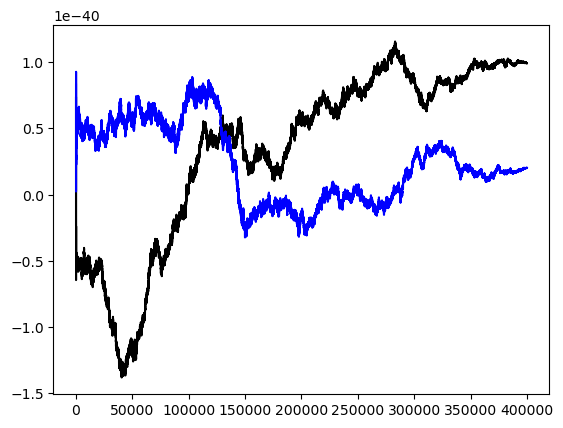

In [72]:
plt.plot(eta[0],'k')
plt.plot(eta[1],'b')

In [74]:
np.mean(eta[0])

3.45255156427323e-41

In [79]:
pth = f'/home/nikolasmif98/Water_viscoelast/Test/0.00000150'#/energy.xvg'

#data_ = np.loadtxt(pth + '/energy.xvg',comments=("#","@","&"),unpack=True)

data_1 = np.loadtxt(pth + '/1energy.xvg',comments=("#","@","&"),unpack=True)


data_2 = np.loadtxt(pth + '/2energy.xvg',comments=("#","@","&"),unpack=True)

data_3 = np.loadtxt(pth + '/3energy.xvg',comments=("#","@","&"),unpack=True)

In [86]:
ihh = np.concatenate((data_2[1],data_3[1]))
data_3[0]+1.00000e+03

ihh_t = np.concatenate((data_2[0],data_3[0]+1.00000e+03))

In [93]:
G = G_star(np.array(ihh[1:]),250000000,300,27*10**(-25))

TypeError: object of type 'numpy.float64' has no len()

In [92]:
len(ihh)#.shape

600002

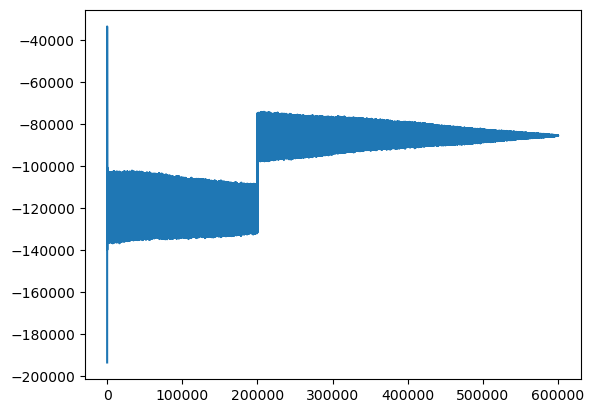

In [102]:
plt.plot(sc.integrate.cumtrapz(np.exp(- 1j*250000000*ihh_t[1:])*ACF(ihh)).real)

In [2]:
pth = f'/home/nikolasmif98/nobackup/Test_2/1'#/energy.xvg'

#data_ = np.loadtxt(pth + '/energy.xvg',comments=("#","@","&"),unpack=True)

data_1 = np.loadtxt(pth + '/2energy.xvg',comments=("#","@","&"),unpack=True)

data_2 = np.loadtxt(pth + '/3energy.xvg',comments=("#","@","&"),unpack=True)

data_3 = np.loadtxt(pth + '/4energy.xvg',comments=("#","@","&"),unpack=True)

data_4 = np.loadtxt(pth + '/5energy.xvg',comments=("#","@","&"),unpack=True)

data_5 = np.loadtxt(pth + '/6energy.xvg',comments=("#","@","&"),unpack=True)

data_6 = np.loadtxt(pth + '/7energy.xvg',comments=("#","@","&"),unpack=True)

data_7 = np.loadtxt(pth + '/8energy.xvg',comments=("#","@","&"),unpack=True)

data_8 = np.loadtxt(pth + '/9energy.xvg',comments=("#","@","&"),unpack=True)

data_9 = np.loadtxt(pth + '/10energy.xvg',comments=("#","@","&"),unpack=True)

a = np.concatenate((data_1[1:,::10],data_2[1:,::10],data_3[1:,::10],data_4[1:,::10],data_5[1:,::10],
                    data_6[1:,::10],data_7[1:,::10],data_8[1:,::10],data_9[1:,::10]),axis=1)

tim = np.concatenate((data_1[0,::10],data_2[0,::10]+data_1[0,-1],data_2[0,::10]+data_1[0,-1]*2,
                      data_2[0,::10]+data_1[0,-1]*3,data_2[0,::10]+data_1[0,-1]*4,
                      data_2[0,::10]+data_1[0,-1]*5,data_2[0,::10]+data_1[0,-1]*6,
                      data_2[0,::10]+data_1[0,-1]*7,data_2[0,::10]+data_1[0,-1]*8,
                      data_2[0,::10]+data_1[0,-1]*9,data_2[0,::10]+data_1[0,-1]
                     ),axis=0)


KeyboardInterrupt: 

In [18]:
pth = f'/home/nikolasmif98/nobackup/Test_2/1'#/energy.xvg'

n=38

print(38+2)
#data_ = np.loadtxt(pth + '/energy.xvg',comments=("#","@","&"),unpack=True)

data_1 = np.loadtxt(pth + f'/{2+n}energy.xvg',comments=("#","@","&"),unpack=True)

data_2 = np.loadtxt(pth + f'/{3+n}energy.xvg',comments=("#","@","&"),unpack=True)

data_3 = np.loadtxt(pth + f'/{4+n}energy.xvg',comments=("#","@","&"),unpack=True)

data_4 = np.loadtxt(pth + f'/{5+n}energy.xvg',comments=("#","@","&"),unpack=True)

data_5 = np.loadtxt(pth + f'/{6+n}energy.xvg',comments=("#","@","&"),unpack=True)

data_6 = np.loadtxt(pth + f'/{7+n}energy.xvg',comments=("#","@","&"),unpack=True)

data_7 = np.loadtxt(pth + f'/{8+n}energy.xvg',comments=("#","@","&"),unpack=True)

data_8 = np.loadtxt(pth + f'/{9+n}energy.xvg',comments=("#","@","&"),unpack=True)

data_9 = np.loadtxt(pth + f'/{10+n}energy.xvg',comments=("#","@","&"),unpack=True)

a = np.concatenate((data_1[1:,::10],data_2[1:,::10],data_3[1:,::10],data_4[1:,::10],data_5[1:,::10],
                    data_6[1:,::10],data_7[1:,::10],data_8[1:,::10],data_9[1:,::10]),axis=1)

tim = np.concatenate((data_1[0,::10],data_2[0,::10]+data_1[0,-1],data_2[0,::10]+data_1[0,-1]*2,
                      data_2[0,::10]+data_1[0,-1]*3,data_2[0,::10]+data_1[0,-1]*4,
                      data_2[0,::10]+data_1[0,-1]*5,data_2[0,::10]+data_1[0,-1]*6,
                      data_2[0,::10]+data_1[0,-1]*7,data_2[0,::10]+data_1[0,-1]*8,
                     ),axis=0)


40


In [16]:
g = np.load('30_39_T.npy',allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: '30_39_T.npy'

In [19]:
np.save('40_49_T.npy',[a,tim])

In [ ]:
import numpy as np

off_set = np.array([10,15,20,25,30,35,40])#])

#off_set = np.array([0,9,16])#,27,36])
#off_set = np.array([40])

#for i in off_set:
    
for folder in range(250,251):
    
    pth = f'/home/nikolasmif98/nobackup/VE_FV_CG/{folder}GHz'
    
    print(pth)
    
    for n in off_set:
        
        print(n)
        
        
        data_1 = np.loadtxt(pth + f'/{n+1}energy.xvg',comments=("#","@","&"),unpack=True,usecols = (0,2,3,6))

        data_2 = np.loadtxt(pth + f'/{n+2}energy.xvg',comments=("#","@","&"),unpack=True,usecols = (0,2,3,6))

        data_3 = np.loadtxt(pth + f'/{n+3}energy.xvg',comments=("#","@","&"),unpack=True,usecols = (0,2,3,6))

        data_4 = np.loadtxt(pth + f'/{n+4}energy.xvg',comments=("#","@","&"),unpack=True,usecols = (0,2,3,6))

        data_5 = np.loadtxt(pth + f'/{n+5}energy.xvg',comments=("#","@","&"),unpack=True,usecols = (0,2,3,6))



        a = np.concatenate((data_1[1:],data_2[1:],data_3[1:],data_4[1:],data_5[1:]),axis=1)

        tim = np.concatenate((data_1[0],data_2[0]+data_1[0,-1],data_2[0]+data_1[0,-1]*2,
                             data_1[0],data_2[0]+data_1[0,-1]),axis=0)
        
        np.save(f'/home/nikolasmif98/nobackup/VE_FV_CG/{folder}_{n}.npy',[a,tim])

        del a,tim,data_1,data_2,data_3,data_4,data_5

        

/home/nikolasmif98/nobackup/VE_FV_CG/250GHz
10
15
20


In [ ]:
#mmap_mode='r'

In [4]:
pth = f'/home/nikolasmif98/nobackup/Test_2/2'
data_1 = np.loadtxt(pth + f'/1energy.xvg',comments=("#","@","&"),unpack=True,usecols = (0,2,3,5))

In [5]:
data_1.shape

(4, 200001)

In [12]:
plt.plot(data_1[4])

IndexError: index 4 is out of bounds for axis 0 with size 4

In [14]:
a = data_2[-1,::100]+data_1[-1,::100]

In [12]:
data_2.shape


(13, 400001)

In [6]:
tim.shape

(360009,)

In [7]:
a.shape

(12, 360009)

In [14]:
g[0].shape

(12, 360009)

In [86]:
a = np.concatenate((data_1[1:,::10],data_2[1:,::10],data_3[1:,::10]),axis=1)
tim = np.concatenate((data_1[0,::10],data_2[0,::10]+data_1[0,-1],data_2[0,::10]+data_1[0,-1]*2),axis=0)

#dat = np.concatenate((tim,a),axis=0)

In [66]:
data_1[0,-1]

2000.0

In [88]:
tim.shape

(120003,)

In [87]:
a.shape

(12, 120003)

In [97]:
tim*10**(-9)

array([0.00000e+00, 5.00000e-11, 1.00000e-10, ..., 5.99990e-06,
       5.99995e-06, 6.00000e-06])

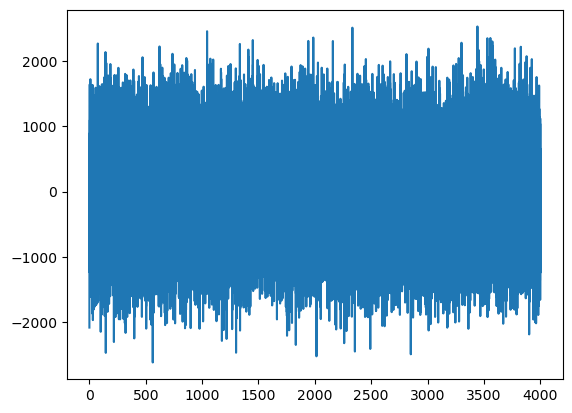

In [68]:
plt.plot(tim,a[0])

In [44]:
G = G_star(data,250000000,300,27*10**(-25))

start own


In [109]:
data=np.array(a[:])

In [45]:
G[0].shape

(80000,)

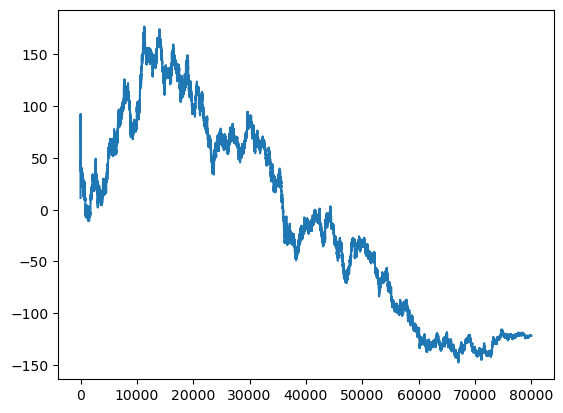

In [46]:
plt.plot(G[0])

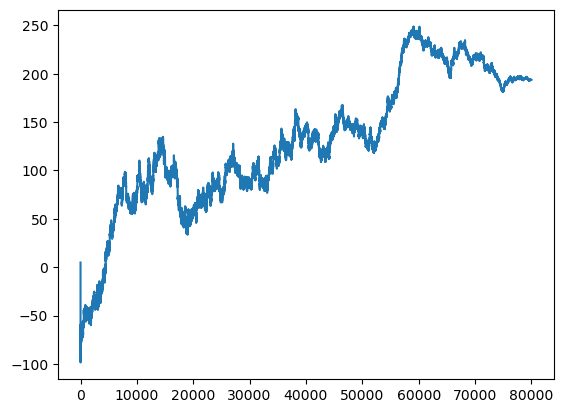

In [47]:
plt.plot(G[1])

In [49]:
np.mean(G[1])

129.87753315117854

In [102]:
b = sc.integrate.cumtrapz(ha[0])

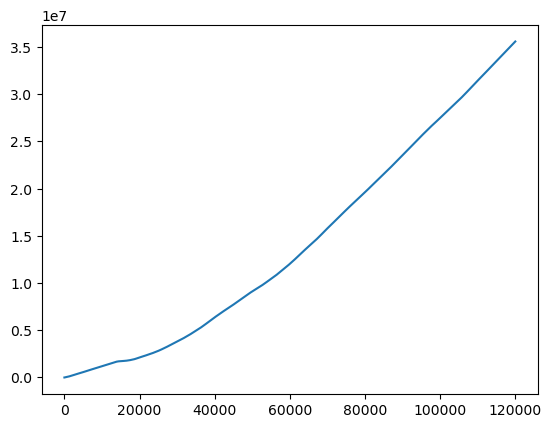

In [103]:
plt.plot(b)

In [8]:
def G_star_(P_tensor,t,omega,T,V): 
    
    #ACF_xy = ACF(P_tensor[])
    #ACF_xz = ACF(P_tensor[])
    #ACF_yz = ACF(P_tensor[])
    
    #AutoCF =(ACF_xy + ACF_xz + ACF_yz )/3
    
    AutoCF = AFC_Wiener(P_tensor)
    
    dt = t[1]-t[0]
    
    
    G_sta = 1j**omega * (V/(kB*T)) * sc.integrate.cumtrapz( np.exp(- 1j*omega*t) * AutoCF[0], P_tensor[0,1:]*10**(-12),dx=dt)
#    G_sta =  sc.integrate.cumtrapz( np.exp(- 1j*omega*data[0,1:]) * AutoCF[0], P_tensor[0,1:]*10**(-12),dx=dt)
    
    G_prime = G_sta.imag
    
    G_dprime = G_sta.real
    
    return G_prime,G_dprime
    
    

In [116]:
ha = G_star_(data,tim[1:],250000000,300,27*10**(-25))

start own


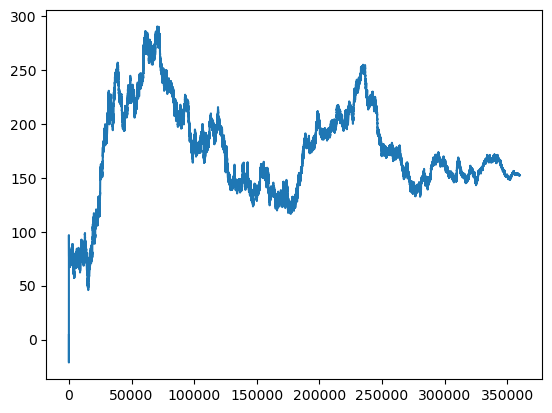

In [117]:
plt.plot(ha[0])

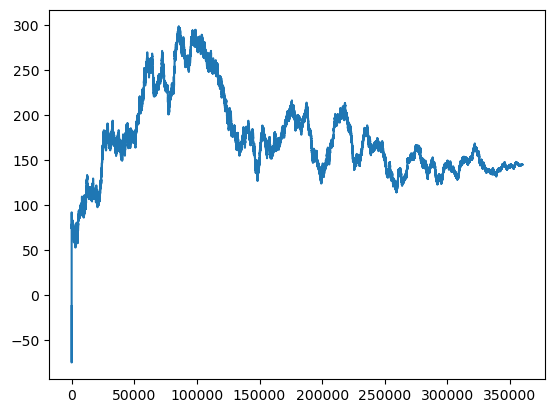

In [118]:
plt.plot(ha[1])

In [95]:
np.mean(ha[0])

296.41547553260745

In [92]:



a = np.load('1_40.npy',allow_pickle=True)#,mmap_mode='r')



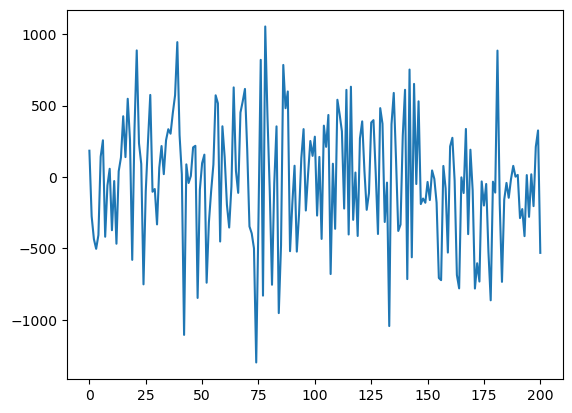

In [15]:
plt.plot(a[0][0][::10000])

In [14]:
a[0][0][::10000].shape

(201,)

In [ ]:
vis_star()

In [17]:
a[1].shape

(2000005,)

In [ ]:
def vis_star(P_tensor,omega,T,V): 
    
    #ACF_xy = ACF(P_tensor[])
    #ACF_xz = ACF(P_tensor[])
    #ACF_yz = ACF(P_tensor[])
    
    #AutoCF =(ACF_xy + ACF_xz + ACF_yz )/3
    
    A_x = ACF(P_tensor)
    
    dt = P_tensor[0,1]-P_tensor[0,0]
    
    
#    G_sta =  (V*(kB*T))/10 * sc.integrate.cumtrapz( np.exp(- 1j*omega*data[0,1:]) * AutoCF[0], P_tensor[0,1:]*10**(-12),dx=dt)
    G_sta =  (V*(kB*T))/10 * sc.integrate.cumtrapz( np.exp(- 1j*omega*data[0,1:]) * AutoCF[0], P_tensor[0,1:]*10**(-12),dx=dt)
    
    G_prime = G_sta.imag
    
    G_dprime = G_sta.real
    
    return G_prime,G_dprime

In [93]:
acf = ACF(a[0][0])

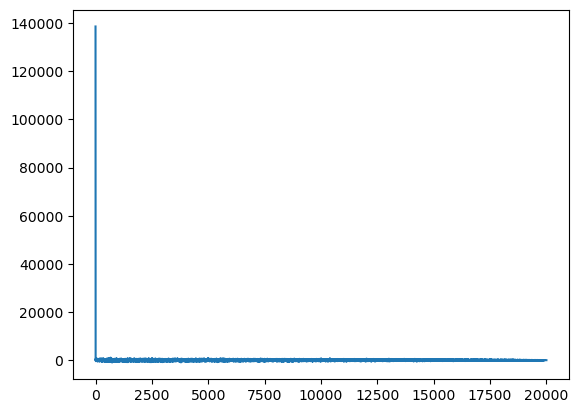

In [94]:
plt.plot(acf[::100])

In [105]:
#omega =250000000
#exp = np.exp(- 1j*omega*time)
inte = sc.integrate.cumtrapz( acf*exp[:-1].real,time[:-1],dx=4.999990e-03)
DI = sc.integrate.cumtrapz( inte,time[:-2],dx=4.999990e-03)

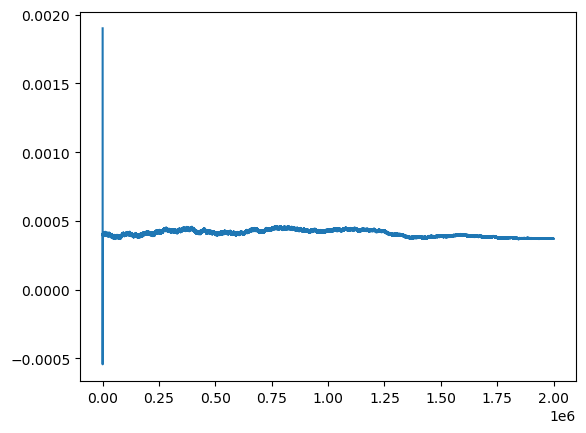

In [116]:
plt.plot(((27*10**(-27)/(kB*300)) *inte))
#plt.xlim(-1,100)

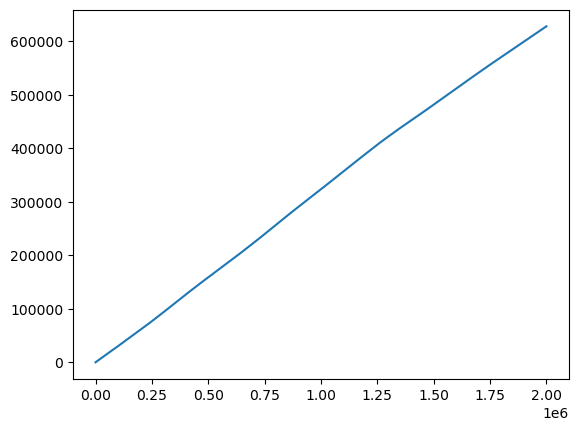

In [111]:
plt.plot(DI)

In [52]:
a[1]

array([0.000000e+00, 5.000000e-03, 1.000000e-02, ..., 3.999990e+03,
       3.999995e+03, 4.000000e+03])

In [60]:
time = np.linspace(0,10000,num=len(a[1]))

In [66]:
time

array([0.000000e+00, 4.999990e-03, 9.999980e-03, ..., 9.999990e+03,
       9.999995e+03, 1.000000e+04])

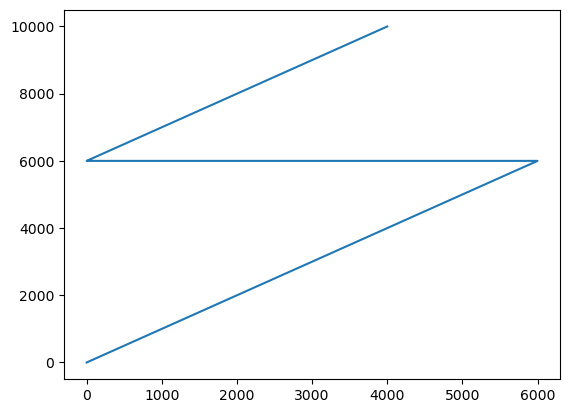

In [62]:
plt.plot(a[1],time)

In [78]:
omega =250000000
exp = np.exp(- 1j*omega*time)

In [79]:
exp

array([ 1.        +0.j        , -0.19341574-0.98111689j,
       -0.9251807 +0.37952691j, ...,  0.44622306-0.89492177j,
       -0.96432811-0.26470984j, -0.07320004+0.99731728j])

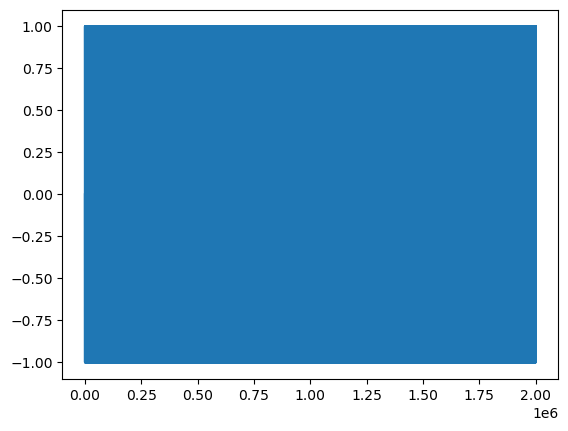

In [82]:
plt.plot(exp.imag)

In [22]:
def G_star(P_tensor,omega,T,V): 
    
    #ACF_xy = ACF(P_tensor[])
    #ACF_xz = ACF(P_tensor[])
    #ACF_yz = ACF(P_tensor[])
    
    #AutoCF =(ACF_xy + ACF_xz + ACF_yz )/3
    
    AutoCF = ACF(P_tensor[0][0])
    
    dt = P_tensor[0]-P_tensor[0]
    
    
    G_sta = 1j**omega * (V/(kB*T)) * sc.integrate.cumtrapz( np.exp(- 1j*omega) * AutoCF[0], P_tensor[0][0]*10**(-12),dx=dt)
#    G_sta =  sc.integrate.cumtrapz( np.exp(- 1j*omega*data[0,1:]) * AutoCF[0], P_tensor[0,1:]*10**(-12),dx=dt)
    
    G_prime = G_sta.imag
    
    G_dprime = G_sta.real
    
    return G_prime,G_dprime
    
    

In [2]:
pth = f'./15_25.npy'
data_1 = np.load(pth,allow_pickle=True)#,usecols = (0,2,3,5))

In [5]:
data_1[0][0].shape

(2000005,)

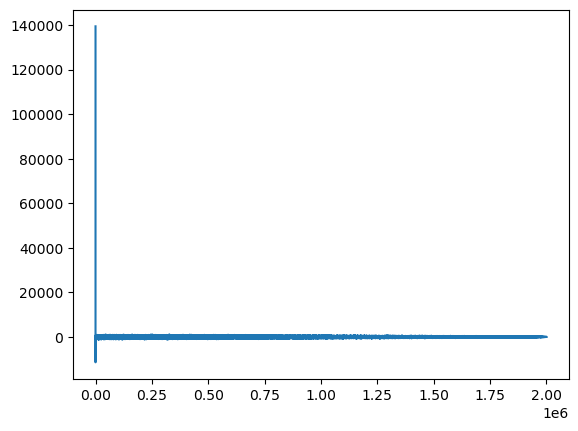

In [7]:
plt.plot(ACF(data_1[0][0]))

In [36]:


imnte = 1j**2500000000 * ((27*10**(-27))/(kB*300))* sc.integrate.cumtrapz( np.exp(- 1j*2500000000) * ACF(data_1[0][0]), data_1[0][0,:-1]*10**(-12),dx=5)



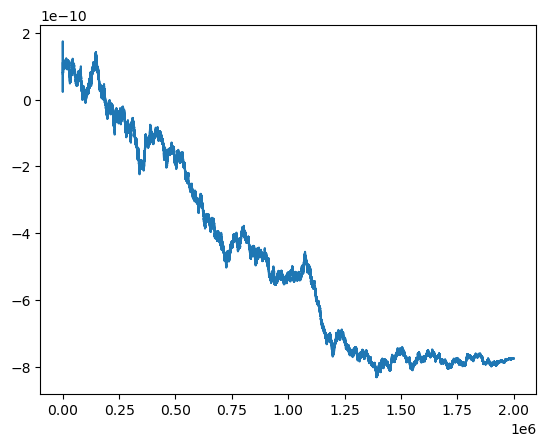

In [39]:
plt.plot(imnte.imag)

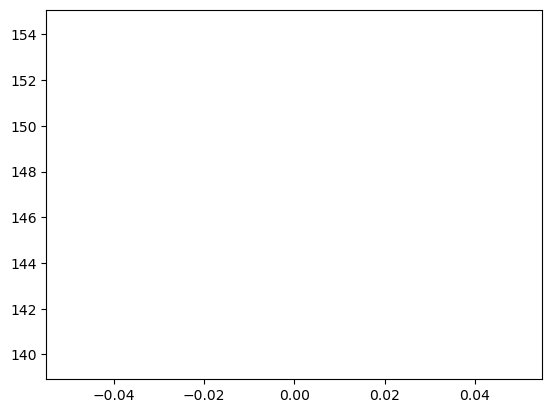

In [5]:
plt.plot(data_1[0])